In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
from matplotlib import rc

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import os.path as path
import matplotlib.ticker as ticker
from scipy.integrate import simps, trapz

import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2.0,
    'legend.columnspacing' : 1.5,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Figure. Training flow & Test result

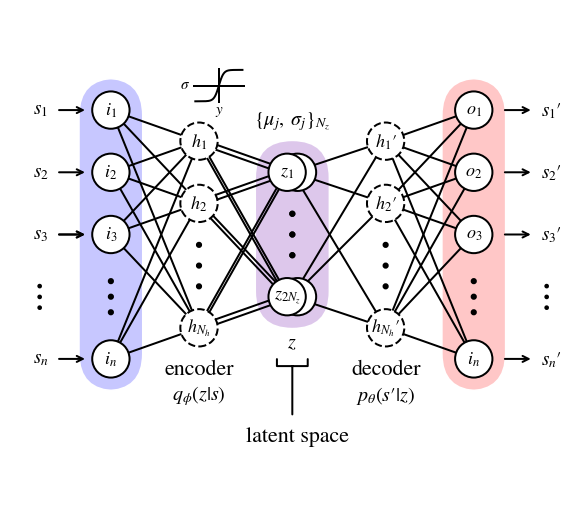

In [3]:
xsize, ysize=1.2, 1.8
ax0 = plt.axes((0.12, 0, xsize, ysize), xticks = [], \
    yticks = [], facecolor = 'None', frameon = False)

inode_x, inode_y = 0.35-0.15, 0.8
hnode_x, hnode_y = 0.52-0.15, inode_y-0.12/2
znode_x, znode_y = 0.69-0.15, inode_y-0.12 #*2+0.12/2
mnode_x, mnode_y = -hnode_x+2*znode_x+0.02, hnode_y
onode_x, onode_y = -inode_x+2*znode_x+0.02, inode_y

r1 = mpatches.FancyBboxPatch((inode_x-0.04,inode_y-0.12*4-0.04), 0.08,0.56, \
    boxstyle = mpatches.BoxStyle("Round", pad = 0.02, \
        rounding_size = 0.07), \
    alpha = 0.22, edgecolor = 'none', facecolor = 'b')
r2 = mpatches.FancyBboxPatch((onode_x-0.04,inode_y-0.12*4-0.04), 0.08,0.56, \
    boxstyle = mpatches.BoxStyle("Round", pad = 0.02, \
        rounding_size = 0.07), \
    alpha = 0.22, edgecolor = 'none', facecolor = 'r')
r3 = mpatches.FancyBboxPatch((znode_x-0.04,znode_y-0.28), 0.10,0.32, \
    boxstyle = mpatches.BoxStyle("Round", pad = 0.02, \
        rounding_size = 0.07), \
    alpha = 0.22, edgecolor = 'none', facecolor = '#6600a7')
ax0.add_patch(r1)
ax0.add_patch(r2)
ax0.add_patch(r3)

# input/output layer
for i in range(3):
    o = mpatches.Circle((inode_x, inode_y-0.12*i), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    ax0.text(inode_x, inode_y-0.12*i, fr'$i_{i+1}$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)
    ax0.annotate('', xy=(inode_x-0.1, 0.8-0.12*i), xytext=(inode_x-0.05, inode_y-0.12*i), \
                 xycoords = 'axes fraction', ha='center', va='center', \
                 arrowprops={'arrowstyle':'<-', 'shrinkA':0, 'shrinkB':0,'lw':2,'mutation_scale':15})
    ax0.text(inode_x-0.15, inode_y-0.12*i, fr'$s_{i+1}$', fontsize = 19, \
             va='center', transform = ax0.transAxes)
    o = mpatches.Circle((onode_x, onode_y-0.12*i), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    ax0.text(onode_x, onode_y-0.12*i, fr'$o_{i+1}$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)
    ax0.annotate('', xy=(onode_x+0.06, 0.8-0.12*i), xytext=(onode_x+0.11, onode_y-0.12*i), \
                 xycoords = 'axes fraction', ha='center', va='center', \
                 arrowprops={'arrowstyle':'<-', 'shrinkA':0, 'shrinkB':0,'lw':2,'mutation_scale':15})
    ax0.text(onode_x+0.13, onode_y-0.12*i, fr'$s_{i+1}\prime$', fontsize = 19, \
             va='center', transform = ax0.transAxes)
for i in range(3):
    o = mpatches.Circle((inode_x, inode_y-0.33-0.03*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    o = mpatches.Circle((onode_x, onode_y-0.33-0.03*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
ax0.annotate('', xy=(inode_x-0.1, inode_y-0.24), xytext=(inode_x-0.05, inode_y-0.24), \
                xycoords = 'axes fraction', ha='center', va='center', \
                arrowprops={'arrowstyle':'<-', 'shrinkA':0, 'shrinkB':0,'lw':2,'mutation_scale':15})
o = mpatches.Circle((inode_x, inode_y-0.12*4), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
ax0.text(inode_x, inode_y-0.12*4, r'$i_{n}$', fontsize = 18, ha='center', va='center', transform=ax0.transAxes)
ax0.text(inode_x-0.15, inode_y-0.12*4, r'$s_{n}$', fontsize = 19, va='center', transform = ax0.transAxes)
ax0.annotate('', xy=(inode_x-0.1, inode_y-0.12*4), xytext=(inode_x-0.05, inode_y-0.12*4), \
             xycoords = 'axes fraction', ha='center', va='center', \
             arrowprops={'arrowstyle':'<-', 'shrinkA':0, 'shrinkB':0,'lw':2,'mutation_scale':15})
o = mpatches.Circle((onode_x, onode_y-0.48), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
ax0.text(onode_x, onode_y-0.12*4, r'$i_{n}$', fontsize = 18, ha='center', va='center', transform=ax0.transAxes)
ax0.text(onode_x+0.13, onode_y-0.12*4, r'$s_{n}\prime$', fontsize = 19, va='center', transform = ax0.transAxes)
ax0.annotate('', xy=(onode_x+0.06, onode_y-0.12*4), xytext=(onode_x+0.11, onode_y-0.12*4), \
             xycoords = 'axes fraction', ha='center', va='center', \
             arrowprops={'arrowstyle':'<-', 'shrinkA':0, 'shrinkB':0,'lw':2,'mutation_scale':15})

# hidden layer
for i in range(2):
    o = mpatches.Circle((hnode_x, hnode_y-0.12*i), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, ls='--', zorder = 2)
    ax0.add_patch(o)
    ax0.text(hnode_x, hnode_y-0.12*i, fr'$h_{i+1}$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)
    o = mpatches.Circle((mnode_x, mnode_y-0.12*i), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, ls='--', zorder = 2)
    ax0.add_patch(o)
    ax0.text(mnode_x, mnode_y-0.12*i, fr'$h_{i+1}\prime$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)
for i in range(3):
    o = mpatches.Circle((hnode_x, hnode_y-0.12*2+0.04-0.04*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    o = mpatches.Circle((mnode_x, mnode_y-0.12*2+0.04-0.04*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
o = mpatches.Circle((hnode_x, hnode_y-0.12*3), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, ls='--', zorder = 2)
ax0.add_patch(o)
ax0.text(hnode_x, hnode_y-0.12*3, r'$h_{N_h}$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)
o = mpatches.Circle((mnode_x, mnode_y-0.12*3), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, ls='--', zorder = 2)
ax0.add_patch(o)
ax0.text(mnode_x, mnode_y-0.12*3, r'$h_{N_h}\prime$', fontsize = 18, \
             ha='center', va='center', transform = ax0.transAxes)

# z layer
o = mpatches.Circle((znode_x+0.02, znode_y), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
o = mpatches.Circle((znode_x, znode_y), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
ax0.text(znode_x, znode_y, r'$z_{1}$', fontsize = 18, ha='center', va='center', transform=ax0.transAxes)

o = mpatches.Circle((znode_x+0.02, znode_y-0.24), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
o = mpatches.Circle((znode_x, znode_y-0.24), \
        radius = 0.036, facecolor = 'w', edgecolor = 'k', lw=2, zorder = 2)
ax0.add_patch(o)
ax0.text(znode_x, znode_y-0.24, r'$z_{2N_z}$', fontsize = 18, ha='center', va='center', transform=ax0.transAxes)

for i in range(3):
    o = mpatches.Circle((znode_x+0.01, znode_y-0.12+0.04-0.04*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    o = mpatches.Circle((znode_x+0.01, znode_y-0.12+0.04-0.04*i), \
        radius = 0.004, facecolor = 'k', edgecolor = 'k', lw=2, zorder = 2)
    ax0.add_patch(o)
    
# lines
iy_coord = [inode_y, inode_y-0.12, inode_y-0.24, inode_y-0.48]
hy_coord = [hnode_y-0.12*i for i in range(2)]
hy_coord.append(hnode_y-0.12*3) # j = 0~2
zy_coord = [znode_y, znode_y-0.24]
for i in range(4):
    for j in range(3):
        ax0.annotate('', \
            xy = (inode_x, iy_coord[i]), \
            xytext = (hnode_x, hy_coord[j]), \
            xycoords='axes fraction', textcoords='axes fraction', \
            arrowprops=dict(arrowstyle='-', color='black', \
                shrinkA=0,shrinkB=0,lw=2), \
            size = 'large', zorder = 1)
        ax0.annotate('', \
            xy = (onode_x, iy_coord[i]), \
            xytext = (mnode_x, hy_coord[j]), \
            xycoords='axes fraction', textcoords='axes fraction', \
            arrowprops=dict(arrowstyle='-', color='black', \
                shrinkA=0,shrinkB=0,lw=2), \
            size = 'large', zorder = 1)

bb = 0.005
for i in range(3):
    for j in range(2):
        ax0.annotate('', \
            xy = (hnode_x, hy_coord[i]+bb), \
            xytext = (znode_x, zy_coord[j]+bb), \
            xycoords='axes fraction', textcoords='axes fraction', \
            arrowprops=dict(arrowstyle='-', color='black', \
                shrinkA=0,shrinkB=0,lw=2), \
            size = 'large', zorder = 1)
        ax0.annotate('', \
            xy = (hnode_x, hy_coord[i]-bb), \
            xytext = (znode_x, zy_coord[j]-bb), \
            xycoords='axes fraction', textcoords='axes fraction', \
            arrowprops=dict(arrowstyle='-', color='black', \
                shrinkA=0,shrinkB=0,lw=2), \
            size = 'large', zorder = 1)
        ax0.annotate('', \
            xy = (mnode_x, hy_coord[i]), \
            xytext = (znode_x+0.01, zy_coord[j]), \
            xycoords='axes fraction', textcoords='axes fraction', \
            arrowprops=dict(arrowstyle='-', color='black', \
                shrinkA=0,shrinkB=0,lw=2), \
            size = 'large', zorder = 1)
        
ax0.text(onode_x+0.14, onode_y-0.36, r'$\cdots$', fontsize=37, rotation=90, \
         va='center', ha='center', transform=ax0.transAxes)
ax0.text(inode_x-0.138, inode_y-0.36, r'$\cdots$', fontsize=37, rotation=90, \
         va='center', ha='center', transform=ax0.transAxes)

ax0.text(mnode_x, inode_y-0.12*4-0.07, r'$p_\theta(s\prime|z)$', fontsize = 20, \
             va='center', ha='center', transform = ax0.transAxes)
ax0.text(hnode_x, inode_y-0.12*4-0.07, r'$q_\phi(z|s)$', fontsize = 20, \
             va='center', ha='center', transform = ax0.transAxes)
ax0.text(mnode_x, inode_y-0.12*4-0.02, 'decoder', fontsize = 22, \
             va='center', ha='center', transform = ax0.transAxes)
ax0.text(hnode_x, inode_y-0.12*4-0.02, 'encoder', fontsize = 22, \
             va='center', ha='center', transform = ax0.transAxes)

ax0.text(znode_x+0.01, inode_y-0.02, r'$\{\mu_j, \;\sigma_j\}_{N_z}$', fontsize = 20, \
             va='center', ha='center', transform = ax0.transAxes)
ax0.text(znode_x+0.01, inode_y-0.45, r'$z$', fontsize = 20, \
             va='center', ha='center', transform = ax0.transAxes)

ax5 = plt.axes((0.55, 1.465, 0.12, 0.12), xticks = [], \
    yticks = [], facecolor = 'None', frameon = True)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['left'].set_visible(False)
ep = np.exp(np.linspace(-5,5,200)) + np.exp(-np.linspace(-5,5,200))
em = np.exp(np.linspace(-5,5,200)) - np.exp(-np.linspace(-5,5,200))
ax5.plot(np.linspace(-5,5,200), em/ep, c='k', lw=2)
ax5.axvline(0, c='k', lw=2)
ax5.axhline(0, c='k', lw=2)
ax5.set_xlabel(r'$y$', fontsize=15)
ax5.xaxis.set_label_coords(0.5, -0.05)
ax5.yaxis.set_label_coords(-0.15, 0.35)
ax5.set_ylabel(r'$\sigma$', fontsize=15, rotation=0)

ax0.annotate('', xy=(inode_x+0.35, inode_y-0.44-0.05), xytext=(inode_x+0.35, inode_y-0.44-0.16),
            fontsize=14, ha='center', va='top', xycoords='axes fraction', 
            bbox=dict(boxstyle='round', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=1.1, lengthB=.5',lw=2), transform = ax0.transAxes)
ax0.text(inode_x+0.26, inode_y-0.44-0.19, 'latent space', fontsize = 22, \
             va='center', transform = ax0.transAxes)

plt.savefig('fig/fig_VAE.pdf', bbox_inches='tight')

# Quasiparticle weight

In [10]:
beta = 60
U_c1_4, U_c2_4 = 2.25, 2.88
    
w_len = len(np.loadtxt(f'{directory}/Bethe_14_beta{beta:d}/Bethe-{2.000:.3f}.dat', \
                       unpack = True, dtype = 'complex128')[0])

up_num = 229
dn_num = 242

U = np.array([0.001*i for i in range(600, 5001)])
U1_4 = np.zeros(up_num, dtype = 'float64')
U2_4 = np.zeros(dn_num, dtype = 'float64')

n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory}/Bethe_14_beta{beta:d}/Bethe-{u:.3f}.dat')==False: continue
    U1_4[n] = u
    n += 1
n = 0
for i, u in enumerate(U):
    if path.isfile(f'{directory}/Bethe_41_beta{beta:d}/Bethe-{u:.3f}.dat')==False: continue
    U2_4[n] = u
    n += 1
    

self_up = np.zeros((len(U1_4), 2638), dtype = 'float64')
self_dn = np.zeros((len(U2_4), 2638), dtype = 'float64')


for i, u in enumerate(U1_4):
    if path.isfile(f'{directory}/Bethe_14_beta{beta:d}/Bethe-{u:.3f}.dat')==False: continue
    w, A, G_r, G_i, S_r, S_i, Xn_r, Xn_i, Xs_r, Xs_i = np.loadtxt(f'{directory}/Bethe_14_beta{beta:d}/Bethe-{u:.3f}.dat', \
                                                                 unpack=True, dtype = 'float64')
    self_up[i] = S_r
for i, u in enumerate(U2_4):
    if path.isfile(f'{directory}/Bethe_41_beta{beta:d}/Bethe-{u:.3f}.dat')==False: continue
    w, A, G_r, G_i, S_r, S_i, Xn_r, Xn_i, Xs_r, Xs_i = np.loadtxt(f'{directory}/Bethe_41_beta{beta:d}/Bethe-{u:.3f}.dat', \
                                                                 unpack=True, dtype = 'float64')
    self_dn[i] = S_r

Z1 = np.zeros(len(U1_4), dtype='float64')
for i, u in enumerate(U1_4):
    a = 0.5*(self_up[i, 1320]-self_up[i, 1319]+self_up[i, 1318]-self_up[i, 1317])/(w.real[1320]-w.real[1317])
    Z1[i] = 1/(1-a)
    
Z2 = np.zeros(len(U2_4), dtype='float64')
for i, u in enumerate(U1_4):
    b = 0.5*(self_dn[i, 1320]-self_dn[i, 1319]+self_dn[i, 1318]-self_dn[i, 1317])/(w.real[1320]-w.real[1317])
    Z2[i] = 1/(1-b)

(1.6, 3.5)

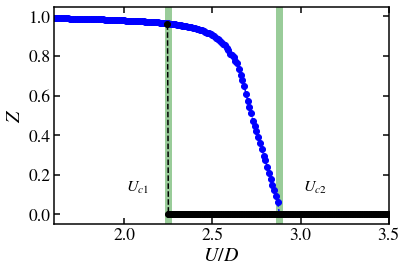

In [11]:
plt.axvline(U_c1_4, c = '#99CC99', lw = '7')
plt.axvline(U_c2_4, c = '#99CC99', lw = '7')
plt.plot(U1_4, Z1, 'bo--')
plt.plot(U2_4, Z2, 'ko--')
plt.annotate(r'$U_{c1}$', xy=(0.25, 0.15), xycoords = 'axes fraction', fontsize=16, ha='center')
plt.annotate(r'$U_{c2}$', xy=(0.78, 0.15), xycoords = 'axes fraction', fontsize=16, ha='center')
plt.xlabel(r'$U/D$', fontsize=20)
plt.ylabel(r'$Z$', fontsize=20)
plt.xlim(1.6, 3.5)